In [75]:
import pandas as pd
import plotnine as p9
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.subplots as sp
import seaborn as sns

In [76]:
data_drug = pd.read_csv('drug_consumption_clean.csv')
data_drug.head()

,age,gender,education,country,n_score,e_score,o_score,a_score,c_score,impulsive,sensation_seeing,alcohol,caffeine,nicotine,recreational_drugs,stimulant_drugs,sedative_drugs,high_risk_drugs
0,35-44,Female,Estudios de FP,UK,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,1,1,0,0,0,0,0
1,25-34,Male,Estudios superiores,UK,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,1,1,1,1,1,0,0
2,35-44,Male,Estudios de FP,UK,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,1,1,0,1,0,0,0
3,18-24,Female,Estudios superiores,UK,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,1,1,0,0,0,1,0
4,35-44,Female,Estudios superiores,UK,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,1,1,0,1,0,0,0


In [77]:
data_drug = data_drug.sort_values(by='age')

### Distribución absoluta de géneros en la muestra

<function matplotlib.pyplot.show(close=None, block=None)>

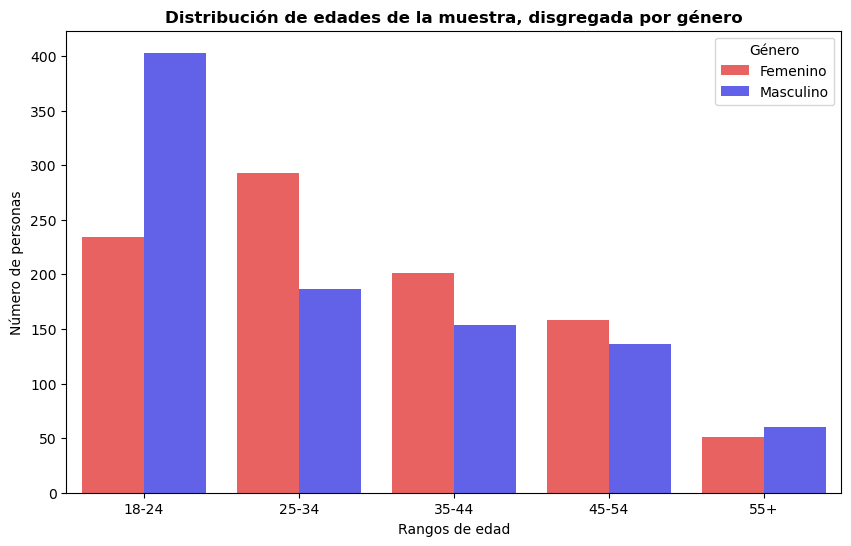

In [100]:
plt.figure(figsize=(10,6))
colors = ["red", "blue"]
alpha = 0.7  # Transparency level
GenderPlot = sns.countplot(x = 'age', hue = 'gender', data = data_drug, palette=colors, alpha=alpha)
GenderPlot.set(ylabel='Número de personas', xlabel='Rangos de edad')
plt.legend(title ='Género', loc = 'upper right', labels =['Femenino', 'Masculino'])
plt.title('Distribución de edades de la muestra, disgregada por género', weight='bold')
plt.show

El gráfico de barras proporciona una cuantificación y comparación efectiva de la prevalencia de hombres y mujeres en cada grupo etario de la muestra. Se observa una variabilidad significativa en el rango de 18-24 años para el subconjunto masculino, con 400 hombres en este rango y el resto distribuido en los demás rangos de edad. En contraste, la distribución de edades para el subconjunto femenino presenta una variabilidad menor, con el rango de 25-34 años siendo el más representado en la muestra. Para todos los rangos de edad, excepto 18-24 y 55+, hay un mayor número de mujeres que de hombres.

### Distribución de frecuencias relativas de consumo por género. Gráfico radial para visualizar tendencias 

In [79]:
data_drug_by_gender = data_drug.drop(columns=['age','education','country','n_score', 'e_score', 'o_score', 'c_score','a_score', 'impulsive', 'sensation_seeing'])
drugs_agg_gender = data_drug_by_gender.groupby("gender")[["alcohol", "caffeine","nicotine","recreational_drugs",'stimulant_drugs','sedative_drugs','high_risk_drugs']].agg('mean')
drugs_agg_gender

,alcohol,caffeine,nicotine,recreational_drugs,stimulant_drugs,sedative_drugs,high_risk_drugs
gender,,,,,,,
Female,0.931697,0.962647,0.467449,0.403415,0.259338,0.320171,0.073639
Male,0.924468,0.972340,0.654255,0.703191,0.478723,0.571277,0.201064


In [96]:
categories = ['Alcohol', 'Cafeína', 'Nicotina', 'Drogas Recreativas', 'Drogas Estimulantes', 'Drogas Sedantes', 'Drogas de Alto Riesgo']

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
    r=drugs_agg_gender.iloc[1],
    theta = categories,
    fill='toself',
    name='Masculino'
))

fig.add_trace(go.Scatterpolar(
    r=drugs_agg_gender.iloc[0],
    theta = categories,
    fill='toself',
    name='Femenino'
))

fig.update_layout(height=400, width=600)
fig.update_layout(polar=dict(radialaxis=dict(range=[0, 1], tickfont=dict(size=10))))
fig.update_layout(legend_title_text='Género')
fig.update_layout(
    title={
        'text': "<b style='text-align: center;'>Tendencias de consumo por género</b>",
        'x':0.5,
        'xanchor': 'center'
    }
)
fig.show()


### Distribución de frecuencias relativas de consumo de drogas ilegales por género. Gráfico radial para visualizar tendencias de drogas con consumo pico

In [81]:
data_drug_by_gender1 = data_drug.drop(columns=["alcohol", "caffeine","nicotine",'age','education','country','n_score', 'e_score', 'o_score', 'c_score','a_score', 'impulsive', 'sensation_seeing'])
drugs_agg_gender1 = data_drug_by_gender1.groupby("gender")[["recreational_drugs",'stimulant_drugs','sedative_drugs','high_risk_drugs']].agg('mean')
drugs_agg_gender1

,recreational_drugs,stimulant_drugs,sedative_drugs,high_risk_drugs
gender,,,,
Female,0.403415,0.259338,0.320171,0.073639
Male,0.703191,0.478723,0.571277,0.201064


In [107]:
categories1 = ['Drogas Recreativas', 'Drogas Estimulantes', 'Drogas Sedantes', 'Drogas de Alto Riesgo']

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
    r=drugs_agg_gender1.iloc[1],
    theta = categories1,
    fill='toself',
    name='Masculino'
))

fig.add_trace(go.Scatterpolar(
    r=drugs_agg_gender1.iloc[0],
    theta = categories1,
    fill='toself',
    name='Femenino'
))

fig.update_layout(height=400, width=600)
fig.update_layout(polar=dict(radialaxis=dict(range=[0, 1], tickfont=dict(size=10))))
fig.update_layout(legend_title_text='Género')
fig.update_layout(
    title={
        'text': "<b style='text-align: center;'>Tendencias de consumo por género</b>",
        'x':0.5,
        'xanchor': 'center'
    }
)
fig.show()


In [116]:
drugs_agg_gender1.columns = ["Drogas Recreativas", "Drogas Estimulantes", "Drogas Sedantes", "Drogas de Alto Riesgo"]

drugs_agg_gender1.rename(columns={"gender": "Genero"}, inplace=True)
drugs_agg_gender1.index = drugs_agg_gender1.index.str.replace("gender", "Género")

drugs_agg_gender1.index = drugs_agg_gender1.index.str.replace("Male", "Masculino")
drugs_agg_gender1.index = drugs_agg_gender1.index.str.replace("Female", "Femenino")

drugs_agg_gender1


           Drogas Recreativas  Drogas Estimulantes  Drogas Sedantes  \
gender                                                                
Femenino             0.403415             0.259338         0.320171   
Masculino            0.703191             0.478723         0.571277   

           Drogas de Alto Riesgo  
gender                            
Femenino                0.073639  
Masculino               0.201064  


### Distribución de frecuencias relativas de consumo de drogas pico de acuerdo a la edad y el nivel educativo

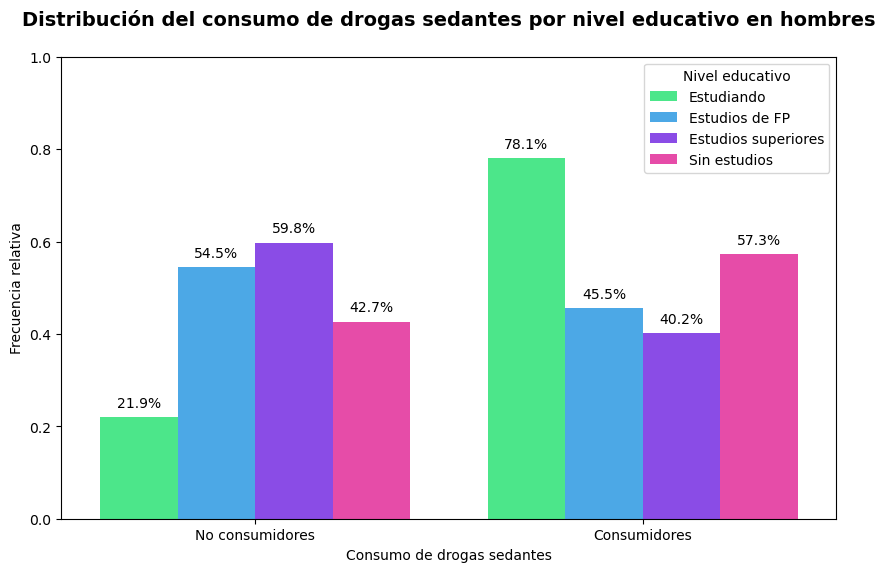

In [117]:
# Sedantes
males = data_drug[data_drug['gender'] == "Male"]

contingency_table = pd.crosstab(males['education'], males['sedative_drugs']) 
relative_frequencies = contingency_table.div(contingency_table.sum(axis=1), axis=0) # Calculo frecuencias relativas para poder comparar

long_format = relative_frequencies.reset_index().melt(id_vars='education', var_name='sedative_drugs', value_name='frequency')

long_format.sort_values(by='sedative_drugs', ascending=False, inplace=True)

palette = sns.hls_palette(h=.4, s=1)
plt.figure(figsize=(10,6))
barplot = sns.barplot(x='sedative_drugs', y='frequency', hue='education', data=long_format,  palette = palette)

for p in barplot.patches: #Valores porcentuales en las barras
    barplot.annotate("{:.1%}".format(p.get_height()), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 10), 
                     textcoords = 'offset points')

labels = ['No consumidores', 'Consumidores']
barplot.set_xticklabels(labels)

plt.xlabel('Consumo de drogas sedantes')
plt.ylabel('Frecuencia relativa')
plt.title('Distribución del consumo de drogas sedantes por nivel educativo en hombres', weight='bold', fontsize =14, y=1.05)
plt.legend(title='Nivel educativo')

plt.ylim(0, 1) #Fijo la escala del eje y 

plt.show()

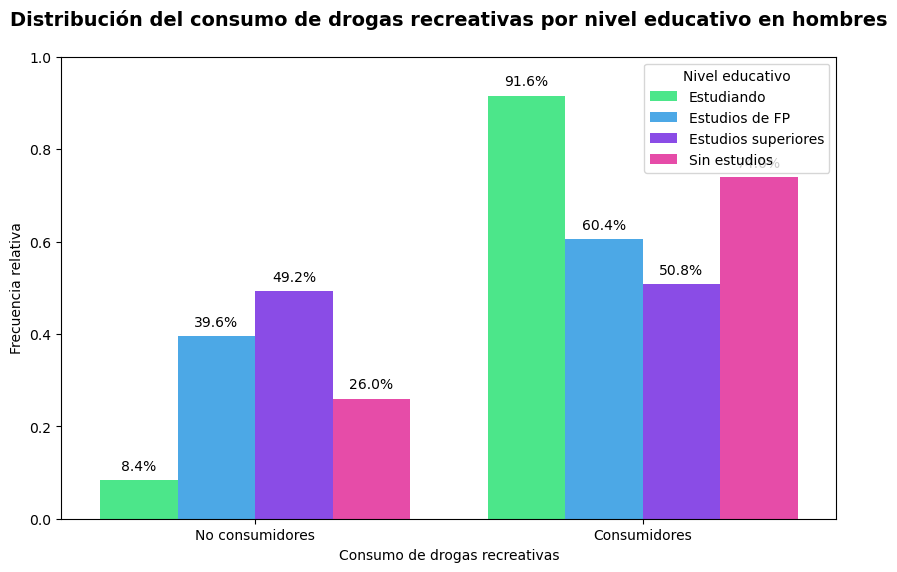

In [118]:
# Recreativas 
contingency_table = pd.crosstab(males['education'], males['recreational_drugs']) 
relative_frequencies = contingency_table.div(contingency_table.sum(axis=1), axis=0) # Calculo frecuencias relativas para poder comparar

long_format = relative_frequencies.reset_index().melt(id_vars='education', var_name='recreational_drugs', value_name='frequency')

long_format.sort_values(by='recreational_drugs', ascending=False, inplace=True)

palette = sns.hls_palette(h=.4, s=1)
plt.figure(figsize=(10,6))
barplot = sns.barplot(x='recreational_drugs', y='frequency', hue='education', data=long_format,  palette = palette)

for p in barplot.patches: # Valores porcentuales en las barras 
    barplot.annotate("{:.1%}".format(p.get_height()), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 10), 
                     textcoords = 'offset points')

labels = ['No consumidores', 'Consumidores']
barplot.set_xticklabels(labels)

plt.xlabel('Consumo de drogas recreativas')
plt.ylabel('Frecuencia relativa')
plt.title('Distribución del consumo de drogas recreativas por nivel educativo en hombres', weight='bold', fontsize =14, y=1.05)
plt.legend(title='Nivel educativo')

plt.ylim(0, 1) #Fijo la escala del eje y 

plt.show()

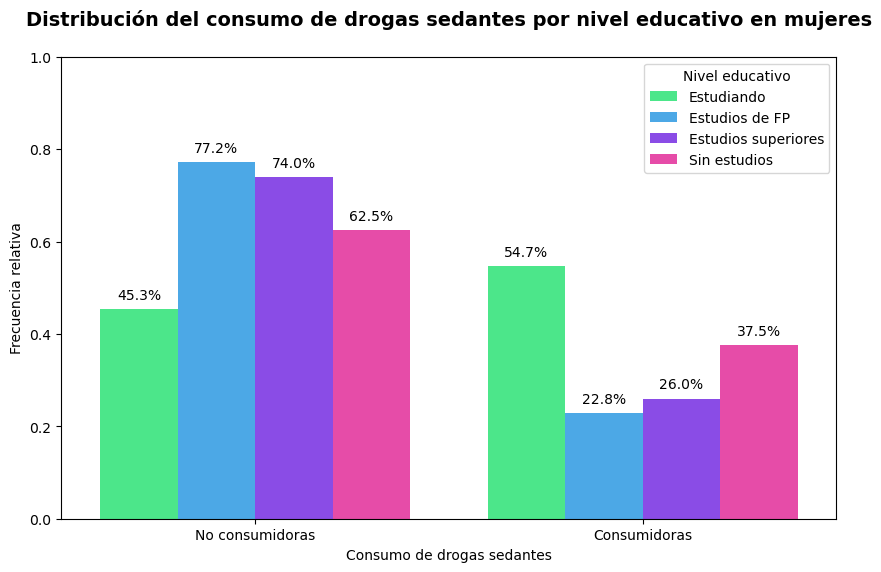

In [119]:
# Sedantes
females = data_drug[data_drug['gender'] == "Female"]

contingency_table = pd.crosstab(females['education'], females['sedative_drugs']) 
relative_frequencies = contingency_table.div(contingency_table.sum(axis=1), axis=0) # Calculo frecuencias relativas para poder comparar

long_format = relative_frequencies.reset_index().melt(id_vars='education', var_name='sedative_drugs', value_name='frequency')

long_format.sort_values(by='sedative_drugs', ascending=False, inplace=True)

palette = sns.hls_palette(h=.4, s=1)
plt.figure(figsize=(10,6))
barplot = sns.barplot(x='sedative_drugs', y='frequency', hue='education', data=long_format,  palette = palette)

for p in barplot.patches: #Valores porcentuales en las barras
    barplot.annotate("{:.1%}".format(p.get_height()), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 10), 
                     textcoords = 'offset points')

labels = ['No consumidoras', 'Consumidoras']
barplot.set_xticklabels(labels)

plt.xlabel('Consumo de drogas sedantes')
plt.ylabel('Frecuencia relativa')
plt.title('Distribución del consumo de drogas sedantes por nivel educativo en mujeres', weight='bold', fontsize =14, y=1.05)
plt.legend(title='Nivel educativo')

plt.ylim(0, 1) #Fijo la escala del eje y 

plt.show()

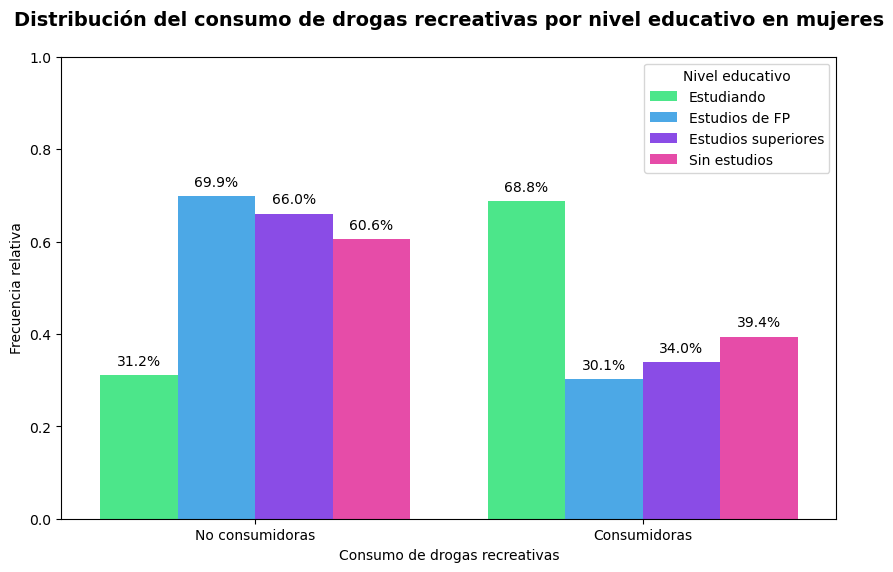

In [120]:
# Recreativas 
contingency_table = pd.crosstab(females['education'], females['recreational_drugs']) 
relative_frequencies = contingency_table.div(contingency_table.sum(axis=1), axis=0) # Calculo frecuencias relativas para poder comparar

long_format = relative_frequencies.reset_index().melt(id_vars='education', var_name='recreational_drugs', value_name='frequency')

long_format.sort_values(by='recreational_drugs', ascending=False, inplace=True)

palette = sns.hls_palette(h=.4, s=1)
plt.figure(figsize=(10,6))
barplot = sns.barplot(x='recreational_drugs', y='frequency', hue='education', data=long_format,  palette = palette)

for p in barplot.patches: # Valores porcentuales en las barras
    barplot.annotate("{:.1%}".format(p.get_height()), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 10), 
                     textcoords = 'offset points')

labels = ['No consumidoras', 'Consumidoras']
barplot.set_xticklabels(labels)

plt.xlabel('Consumo de drogas recreativas')
plt.ylabel('Frecuencia relativa')
plt.title('Distribución del consumo de drogas recreativas por nivel educativo en mujeres', weight='bold', fontsize =14, y=1.05)
plt.legend(title='Nivel educativo')

plt.ylim(0, 1) #Fijo la escala del eje y 

plt.show()

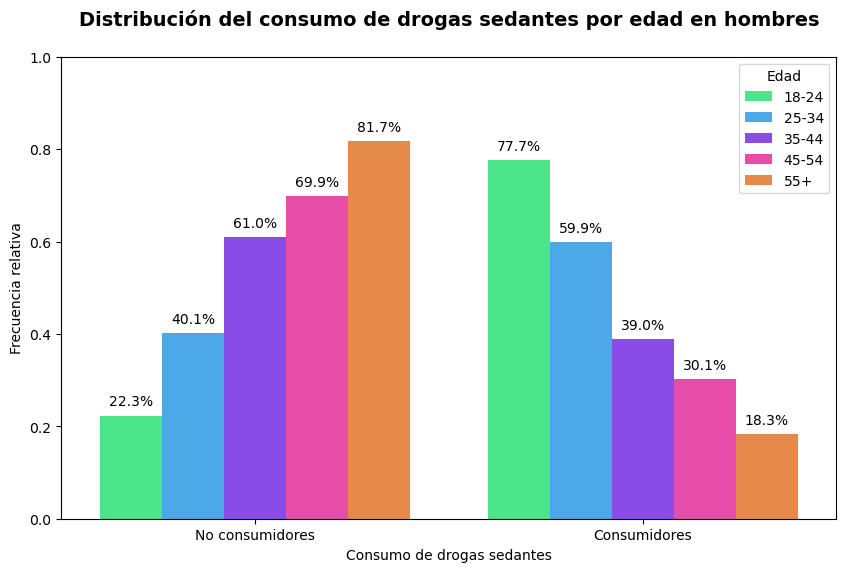

In [121]:
# Sedantes, edad, hombres
contingency_table = pd.crosstab(males['age'], males['sedative_drugs']) 
relative_frequencies = contingency_table.div(contingency_table.sum(axis=1), axis=0) # Calculo frecuencias relativas para poder comparar

long_format = relative_frequencies.reset_index().melt(id_vars='age', var_name='sedative_drugs', value_name='frequency')

long_format.sort_values(by='age', ascending=True, inplace=True)

palette = sns.hls_palette(h=.4, s=1)
plt.figure(figsize=(10,6))
barplot = sns.barplot(x='sedative_drugs', y='frequency', hue='age', data=long_format,  palette = palette)

for p in barplot.patches: # Valores porcentuales en las barras
    barplot.annotate("{:.1%}".format(p.get_height()), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 10), 
                     textcoords = 'offset points')

labels = ['No consumidores', 'Consumidores']
barplot.set_xticklabels(labels)

plt.xlabel('Consumo de drogas sedantes')
plt.ylabel('Frecuencia relativa')
plt.title('Distribución del consumo de drogas sedantes por edad en hombres', weight='bold', fontsize =14, y=1.05)
plt.legend(title='Edad')

plt.ylim(0, 1) #Fijo la escala del eje y 

plt.show()

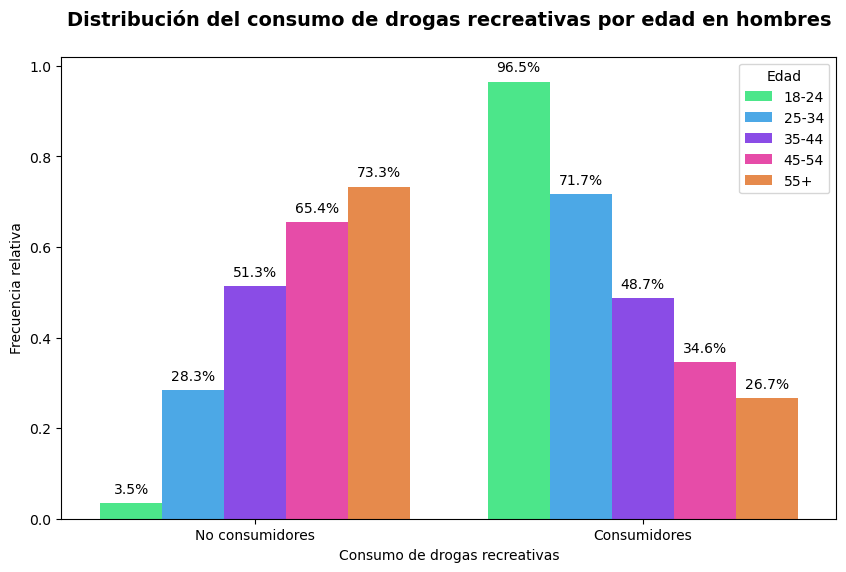

In [125]:
# Recreativas, edad, hombres
contingency_table = pd.crosstab(males['age'], males['recreational_drugs']) 
relative_frequencies = contingency_table.div(contingency_table.sum(axis=1), axis=0) # Calculo frecuencias relativas para poder comparar

long_format = relative_frequencies.reset_index().melt(id_vars='age', var_name='recreational_drugs', value_name='frequency')

long_format.sort_values(by='age', ascending=True, inplace=True)

palette = sns.hls_palette(h=.4, s=1)
plt.figure(figsize=(10,6))
barplot = sns.barplot(x='recreational_drugs', y='frequency', hue='age', data=long_format,  palette = palette)

for p in barplot.patches: # Valores porcentuales en las barras
    barplot.annotate("{:.1%}".format(p.get_height()), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 10), 
                     textcoords = 'offset points')

labels = ['No consumidores', 'Consumidores']
barplot.set_xticklabels(labels)

plt.xlabel('Consumo de drogas recreativas')
plt.ylabel('Frecuencia relativa')
plt.title('Distribución del consumo de drogas recreativas por edad en hombres', weight='bold', fontsize =14, y=1.05)
plt.legend(title='Edad')

plt.ylim(0, 1.02) #Fijo la escala del eje y 

plt.show()

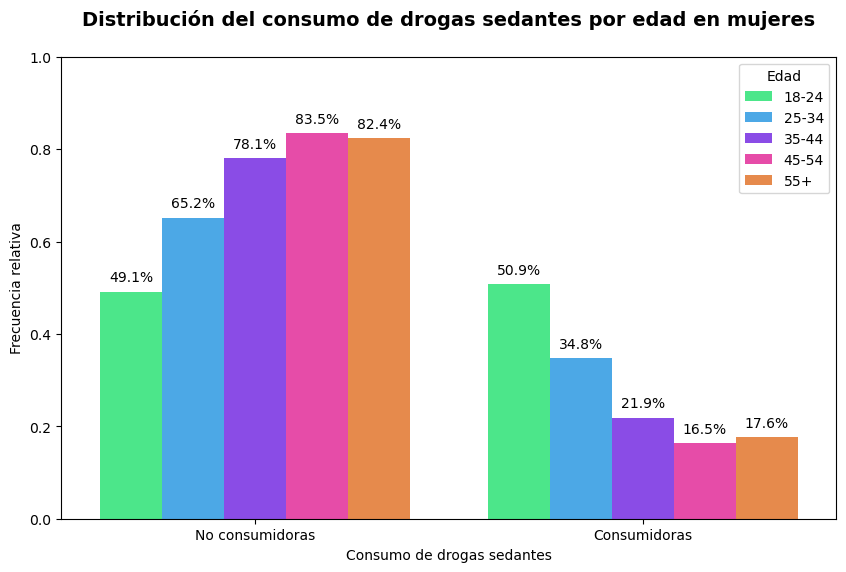

In [126]:
# Sedantes, edad, mujeres
contingency_table = pd.crosstab(females['age'], females['sedative_drugs']) 
relative_frequencies = contingency_table.div(contingency_table.sum(axis=1), axis=0) # Calculo frecuencias relativas para poder comparar

long_format = relative_frequencies.reset_index().melt(id_vars='age', var_name='sedative_drugs', value_name='frequency')

long_format.sort_values(by='age', ascending=True, inplace=True)

palette = sns.hls_palette(h=.4, s=1)
plt.figure(figsize=(10,6))
barplot = sns.barplot(x='sedative_drugs', y='frequency', hue='age', data=long_format,  palette = palette)

for p in barplot.patches: # Valores porcentuales en las barras
    barplot.annotate("{:.1%}".format(p.get_height()), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 10), 
                     textcoords = 'offset points')

labels = ['No consumidoras', 'Consumidoras']
barplot.set_xticklabels(labels)

plt.xlabel('Consumo de drogas sedantes')
plt.ylabel('Frecuencia relativa')
plt.title('Distribución del consumo de drogas sedantes por edad en mujeres', weight='bold', fontsize =14, y=1.05)
plt.legend(title='Edad')

plt.ylim(0, 1) #Fijo la escala del eje y 

plt.show()

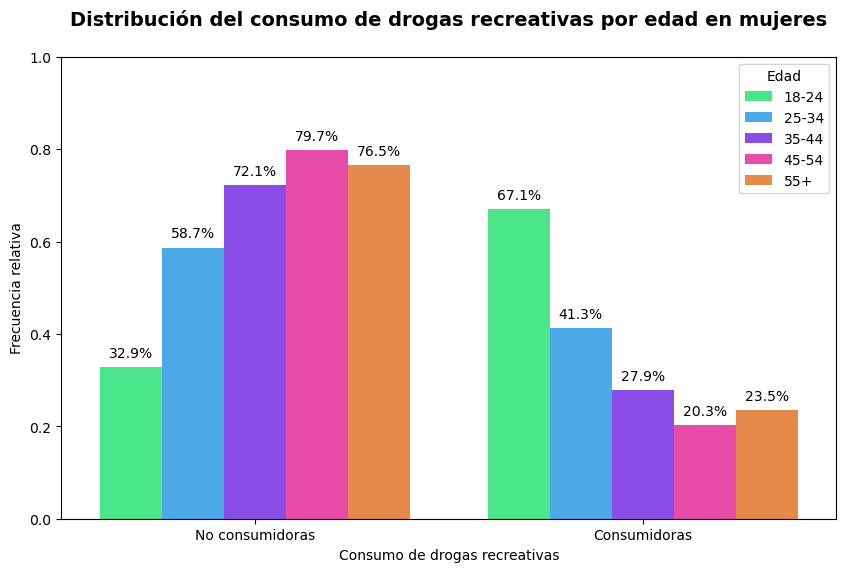

In [127]:
# Recreativas, edad, mujeres
contingency_table = pd.crosstab(females['age'], females['recreational_drugs']) 
relative_frequencies = contingency_table.div(contingency_table.sum(axis=1), axis=0) # Calculo frecuencias relativas para poder comparar

long_format = relative_frequencies.reset_index().melt(id_vars='age', var_name='recreational_drugs', value_name='frequency')

long_format.sort_values(by='age', ascending=True, inplace=True)

palette = sns.hls_palette(h=.4, s=1)
plt.figure(figsize=(10,6))
barplot = sns.barplot(x='recreational_drugs', y='frequency', hue='age', data=long_format,  palette = palette)

for p in barplot.patches: # Valores porcentuales en las barras
    barplot.annotate("{:.1%}".format(p.get_height()), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 10), 
                     textcoords = 'offset points')

labels = ['No consumidoras', 'Consumidoras']
barplot.set_xticklabels(labels)

plt.xlabel('Consumo de drogas recreativas')
plt.ylabel('Frecuencia relativa')
plt.title('Distribución del consumo de drogas recreativas por edad en mujeres', weight='bold', fontsize =14, y=1.05)
plt.legend(title='Edad')

plt.ylim(0, 1) #Fijo la escala del eje y 

plt.show()